In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from operator import add

In [2]:
from sklearn.linear_model import LassoCV, RidgeCV

In [3]:
df_train = pd.read_csv('train.csv',header=-1)
df_train.columns = ['Age', 'Workclass', 'FNLWGT', 'Education', 'Education Num', 'Marital Status', 
                    'Occupation', 'Relationship', 'Race', 'Sex', 'Capital Gain', 'Capital Loss', 
                    'Hours Per Week', 'Native Country', 'Income']

In [4]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

In [5]:
le = LabelEncoder()
lb = LabelBinarizer()

In [6]:
y_train = lb.fit_transform(df_train['Income'].values)

In [7]:
df_train['Workclass'] = le.fit_transform(df_train['Workclass'].values)
df_train['Education'] = le.fit_transform(df_train['Education'].values)
df_train['Marital Status'] = le.fit_transform(df_train['Marital Status'].values)
df_train['Occupation'] = le.fit_transform(df_train['Occupation'].values)
df_train['Relationship'] = le.fit_transform(df_train['Relationship'].values)
df_train['Race'] = le.fit_transform(df_train['Race'].values)
df_train['Sex'] = le.fit_transform(df_train['Sex'].values)
df_train['Native Country'] = le.fit_transform(df_train['Native Country'].values)

In [8]:
X_train = df_train.loc[:, 'Age':'Native Country']

In [9]:
for cat, value in X_train.iteritems():
    X_train[cat] = (X_train[cat].values - np.mean(X_train[cat].values))/np.std(X_train[cat].values)

In [10]:
X_train['Intercept'] = np.ones(30162)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [13]:
model = LassoCV(cv=5)

In [14]:
y_train = y_train[:,0]

In [15]:
y_val = y_val[:,0]

In [16]:
model.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [17]:
l1 = model.alpha_

In [18]:
model1 = RidgeCV(cv=5)

In [19]:
model1.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=5, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [20]:
l2 = model.alpha_

In [21]:
df_test = pd.read_csv('test.csv', header=-1)

In [22]:
df_test.columns = df_train.columns

In [23]:
df_test['Workclass'] = le.fit_transform(df_test['Workclass'].values)
df_test['Education'] = le.fit_transform(df_test['Education'].values)
df_test['Marital Status'] = le.fit_transform(df_test['Marital Status'].values)
df_test['Occupation'] = le.fit_transform(df_test['Occupation'].values)
df_test['Relationship'] = le.fit_transform(df_test['Relationship'].values)
df_test['Race'] = le.fit_transform(df_test['Race'].values)
df_test['Sex'] = le.fit_transform(df_test['Sex'].values)
df_test['Native Country'] = le.fit_transform(df_test['Native Country'].values)

In [24]:
X_test = df_test.loc[:, 'Age':'Native Country']

In [25]:
y_test = lb.fit_transform(df_test['Income'].values)

In [26]:
y_test = y_test[:,0]

In [27]:
for cat, value in X_test.iteritems():
    X_test[cat] = (X_test[cat].values - np.mean(X_test[cat].values))/np.std(X_test[cat].values)

In [28]:
X_test['Intercept'] = np.ones(15060)

In [29]:
def accuracy_score(y_pred, y):
    return np.sum(y_pred == y)/y_pred.size

In [30]:
np.random.seed(10)
theta_t = np.random.rand(15)
alpha = 0.01
def L1_GD(X_train, y_train, X_val, y_val, X_test, y_test, lambd, alpha, theta_t):
    error_train = []
    error_val = []
    error_test = []
    acc_train = []
    acc_val = []
    acc_test = []
    for i in range(1000):
        z_train = np.dot(X_train, theta_t)
        hypo_train = 1 / (1 + np.exp(-z_train))
        error1 = (hypo_train - y_train)
        err1 = error1.mean()
        error_train.append(err1)
        theta_t = theta_t - (((alpha/len(y_train)) * np.dot(X_train.T, (error1))) + (lambd * np.sign(theta_t)))
        acc1 = accuracy_score(y_train, hypo_train.round())
        acc_train.append(acc1)
        
        z_val = np.dot(X_val, theta_t)
        hypo_val = 1 / (1 + np.exp(-z_val))
        error2 = (hypo_val - y_val)
        err2 = error2.mean()
        error_val.append(err2)
        acc2 = accuracy_score(y_val, hypo_val.round())
        acc_val.append(acc2)
        
        z_test = np.dot(X_test, theta_t)
        hypo_test = 1 / (1 + np.exp(-z_test))
        error3 = (hypo_test - y_test)
        err3 = error3.mean()
        error_test.append(err3)
        acc3 = accuracy_score(y_test, hypo_test.round())
        acc_test.append(acc3)
    return error_train, error_val, error_test, acc_train, acc_val, acc_test

In [31]:
error_train_l1, error_val_l1, error_test_l1, acc_train_l1, acc_val_l1, acc_test_l1 = L1_GD(X_train, y_train, X_val, y_val, X_test, y_test, l1, alpha, theta_t)

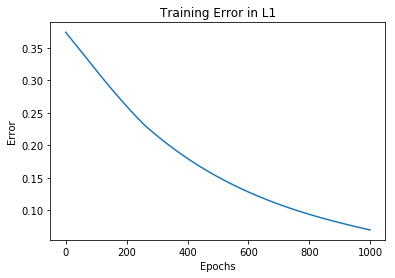

In [32]:
f1=plt.figure(1)
plt.plot(error_train_l1)
plt.title('Training Error in L1')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

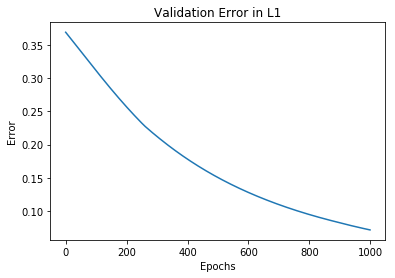

In [33]:
fig2 = plt.figure(2)
plt.plot(error_val_l1)
plt.title('Validation Error in L1')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

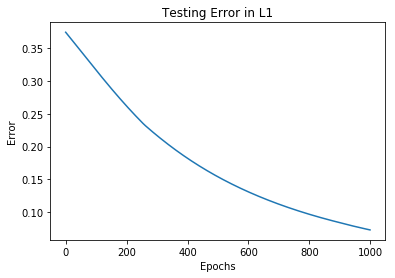

In [34]:
fig3 = plt.figure(3)
plt.plot(error_test_l1)
plt.title('Testing Error in L1')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

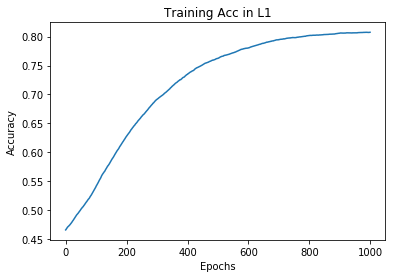

In [35]:
fig4 = plt.figure(4)
plt.plot(acc_train_l1)
plt.title('Training Acc in L1')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

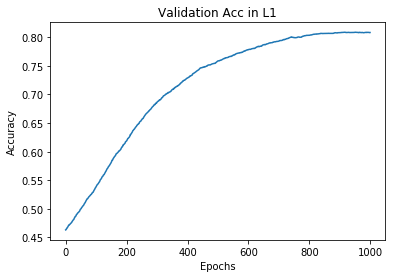

In [36]:
fig5 = plt.figure(5)
plt.plot(acc_val_l1)
plt.title('Validation Acc in L1')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

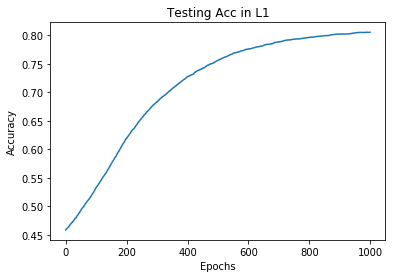

In [37]:
fig6 = plt.figure(6)
plt.plot(acc_test_l1)
plt.title('Testing Acc in L1')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [38]:
np.random.seed(10)
theta_t = np.random.rand(15)
alpha = 0.01
def L2_GD(X_train, y_train, X_val, y_val, X_test, y_test, lambd, alpha, theta_t):
    error_train = []
    error_val = []
    error_test = []
    acc_train = []
    acc_val = []
    acc_test = []
    for i in range(1000):
        z_train = np.dot(X_train, theta_t)
        hypo_train = 1 / (1 + np.exp(-z_train))
        error1 = (hypo_train - y_train)
        err1 = error1.mean()
        error_train.append(err1)
        theta_t = theta_t - (((alpha/len(y_train)) * np.dot(X_train.T, (error1))) + (2 * lambd * np.sum(theta_t)))
        acc1 = accuracy_score(y_train, hypo_train.round())
        acc_train.append(acc1)
        
        z_val = np.dot(X_val, theta_t)
        hypo_val = 1 / (1 + np.exp(-z_val))
        error2 = (hypo_val - y_val)
        err2 = error2.mean()
        error_val.append(err2)
        acc2 = accuracy_score(y_val, hypo_val.round())
        acc_val.append(acc2)
        
        z_test = np.dot(X_test, theta_t)
        hypo_test = 1 / (1 + np.exp(-z_test))
        error3 = (hypo_test - y_test)
        err3 = error3.mean()
        error_test.append(err3)
        acc3 = accuracy_score(y_test, hypo_test.round())
        acc_test.append(acc3)
    return error_train, error_val, error_test, acc_train, acc_val, acc_test

In [39]:
error_train_l2, error_val_l2, error_test_l2, acc_train_l2, acc_val_l2, acc_test_l2 = L2_GD(
    X_train, y_train, X_val, y_val, X_test, y_test, l2, alpha, theta_t)

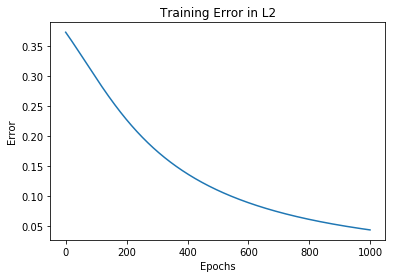

In [40]:
fig7 = plt.figure(7)
plt.plot(error_train_l2)
plt.title('Training Error in L2')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

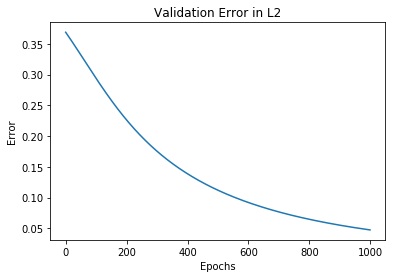

In [41]:
fig8 = plt.figure(8)
plt.plot(error_val_l2)
plt.title('Validation Error in L2')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

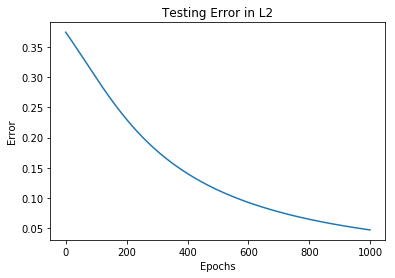

In [42]:
fig9 = plt.figure(9)
plt.plot(error_test_l2)
plt.title('Testing Error in L2')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

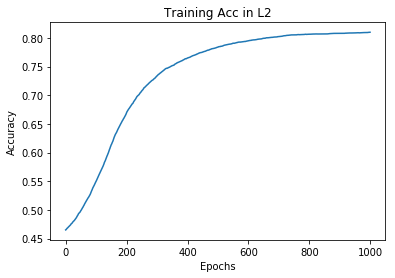

In [43]:
fig10 = plt.figure(10)
plt.plot(acc_train_l2)
plt.title('Training Acc in L2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

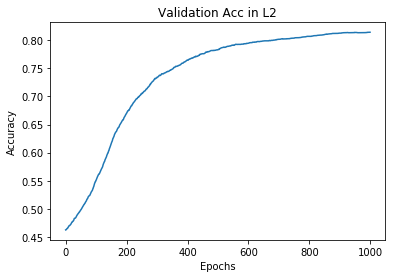

In [44]:
fig11 = plt.figure(11)
plt.plot(acc_val_l2)
plt.title('Validation Acc in L2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

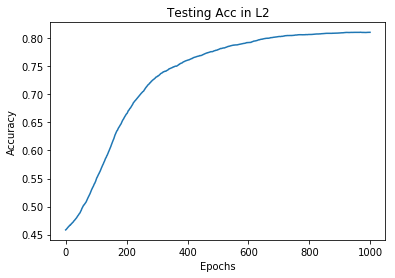

In [45]:
fig12 = plt.figure(12)
plt.plot(acc_test_l2)
plt.title('Testing Acc in L2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()